<a href="https://colab.research.google.com/github/barauna-lo/FastRadioBurst_Lab/blob/main/CHIME_FRB_Waterfall_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use this tutorial:

https://chime-frb-open-data.github.io/waterfall/

data are available here:

https://www.canfar.net/storage/vault/list/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data

## Open Problemns


* Corrigir o DM 

In [2]:
#Import Librarys
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import io
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.pyplot import figure
import h5py
import scipy
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import gridspec
import gdown


In [3]:
files = ['https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701E_waterfall.h5',
 'https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701D_waterfall.h5',
 'https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701C_waterfall.h5',
 'https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701B_waterfall.h5',
 'https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701A_waterfall.h5',
 'https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190630D_waterfall.h5'
]

In [4]:
#Downloading with `files` url
for i in range(len(files)): gdown.download(files[i])

Downloading...
From: https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701E_waterfall.h5
To: /content/FRB20190701E_waterfall.h5
100%|██████████| 35.5M/35.5M [01:10<00:00, 503kB/s]
Downloading...
From: https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701D_waterfall.h5
To: /content/FRB20190701D_waterfall.h5
100%|██████████| 60.7M/60.7M [00:24<00:00, 2.49MB/s]
Downloading...
From: https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701C_waterfall.h5
To: /content/FRB20190701C_waterfall.h5
100%|██████████| 35.5M/35.5M [00:13<00:00, 2.57MB/s]
Downloading...
From: https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190701B_waterfall.h5
To: /content/FRB20190701B_waterfall.h5
100%|██████████| 3

# Unpack the Data

## Metadata Description

    extent: the extent of the waterfall data
    plot_freq: The values of the frequecy indices in \(\rm{MHz}\)
    plot_time: The value of the time indices in \(\rm{\mu s}\)
    wfall: waterfall data
    model_wfall: waterfall from fitted data
    spec: Dynamic Spectrum
    model_spec: model-fitted dynamic spectrum
    ts: time series data
    model_ts: model-fitted time series
    caliberated_wfall: The waterfall data with calibration applied



In [5]:
# Definindo vetor vazio
file_name = []
# Alocando o nome dos arquivos que foram baixado
for i in range(len(files)): file_name.append(files[i][-25:])

In [6]:
#Redind and alocatind data

wfalls           = []
model_specs      = [] 
eventnames       = []
wfalls           = []
model_wfalls     = []
plot_times       = []
plot_freqs       = []
tss              = []
model_tss        = []
specs            = []
model_specs      = []
extents          = []
dms              = []
scatterfits      = []
cal_obs_dates    = []
cal_source_names = []
cal_wfalls       = []


for i in range(len(file_name)):
  eventnames.append(       h5py.File(file_name[i], "r")["frb"].attrs["tns_name"].decode())
  wfalls.append(           h5py.File(file_name[i], "r")["frb"]["wfall"][:])
  model_wfalls.append(     h5py.File(file_name[i], "r")["frb"]["model_wfall"][:])
  plot_times.append(       h5py.File(file_name[i], "r")["frb"]["plot_time"][:])
  plot_freqs.append(       h5py.File(file_name[i], "r")["frb"]["plot_freq"][:])
  tss.append(              h5py.File(file_name[i], "r")["frb"]["ts"][:])
  model_tss.append(        h5py.File(file_name[i], "r")["frb"]["model_ts"][:])
  specs.append(            h5py.File(file_name[i], "r")["frb"]["spec"][:])
  model_specs.append(      h5py.File(file_name[i], "r")["frb"]["model_spec"][:])
  extents.append(          h5py.File(file_name[i], "r")["frb"]["extent"][:])
  dms.append(              h5py.File(file_name[i], "r")["frb"].attrs["dm"][()])
  scatterfits.append(      h5py.File(file_name[i], "r")["frb"].attrs["scatterfit"][()])
  cal_obs_dates.append(    h5py.File(file_name[i], "r")["frb"].attrs["calibration_observation_date"].decode())
  cal_source_names.append( h5py.File(file_name[i], "r")["frb"].attrs["calibration_source_name"].decode())
  cal_wfalls.append(       h5py.File(file_name[i], "r")["frb"]["calibrated_wfall"][:])


In [7]:
#Creating the bin_frqs function
# Essa funação tem como somar os canais originais. 
def bin_freq_channels(data, fbin_factor=4):
    num_chan = data.shape[0]
    if num_chan % fbin_factor != 0:
        raise ValueError("frequency binning factor `fbin_factor` should be even")
    data = np.nanmean(data.reshape((num_chan // fbin_factor, fbin_factor) + data.shape[1:]), axis=1)
    return data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


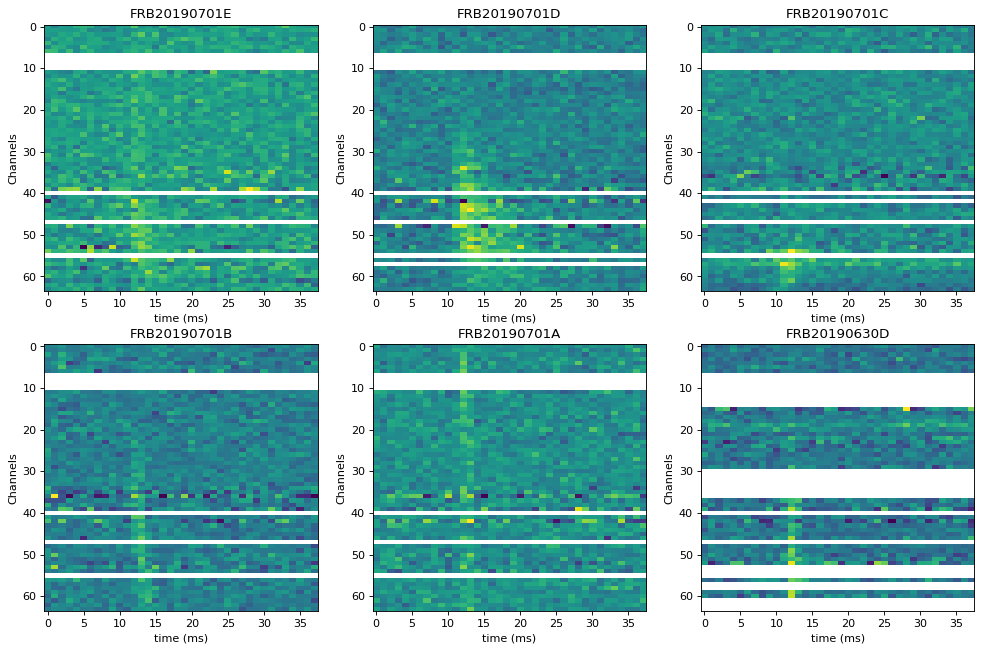

In [13]:
#Ploting FRBS Waterfall
n_rows, n_collums = 3,3
bins = 256
plt.figure(figsize=(15,15),dpi=80)
for i in range(len(files)):
  x = bin_freq_channels(wfalls[i],bins)
  plt.subplot(n_rows,n_collums,i+1)
  plt.imshow(x, aspect="auto")
  plt.title(eventnames[i])
  plt.ylabel('Channels')
  plt.xlabel('time (ms)')
  #plt.yticks(400, 500, 600, 700, 800])


# DM Function
$$
\left(\frac{\Delta t}{s}\right) \approx \frac{q_e^2}{2\pi m_ec} \left(\frac{DM}{pc \ cm^{-3}}\right) \left[\left(\frac{\nu_{menor}}{GHz}\right)^{-2} - \left(\frac{\nu_{maior}}{GHz}\right)^{-2}\right]
$$

In [ ]:
from astropy import constants as const
q   = const.e.value
m_e = const.m_e.value
c   = const.c.value
cte = q**2/(2*np.pi*m_e*c)

def dm_corrector(nu_i,nu_f,dm):
  return cte*dm*(nu_i**(-2)-nu_f**(-2))

In [ ]:
binada = bin_freq_channels(wfalls[0],64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


In [ ]:
print

(256, 38)

In [ ]:
print(binada[1])

[-3.19869053e-02 -3.62100545e-03 -7.86313973e-03  2.22335570e-02
 -2.65240669e-03  2.66204188e-02  3.83564364e-03 -3.47699970e-05
 -1.84109192e-02 -3.00707454e-02 -1.21310744e-02  6.45351410e-03
  2.94218343e-02 -2.16928832e-02  8.51673353e-03 -2.86745634e-02
  4.85866228e-02  9.42892581e-03  5.11302613e-03 -2.53708698e-02
  9.63132083e-03  1.40209524e-02  2.51668179e-02 -8.23042076e-03
  1.42240897e-05  2.76970295e-02  1.85913127e-03 -1.82059547e-02
  1.19802644e-02 -1.45834703e-02  1.00207124e-02 -1.54125951e-02
  7.02474080e-03  1.58024020e-02  2.58623995e-02  7.73897674e-03
  3.18163261e-03 -1.28478212e-02]


In [ ]:
inicial = 400
final = 400 + 400/binada.shape[0]
dm_corretor[]

In [ ]:
i=3
dm_corrector(binada[0][0],binada[0][1],dms[0])

5.955767297026316e-10

In [ ]:
i=4
print(plot_times[0][i+1]-plot_times[0][i])

0.9830400231294334


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


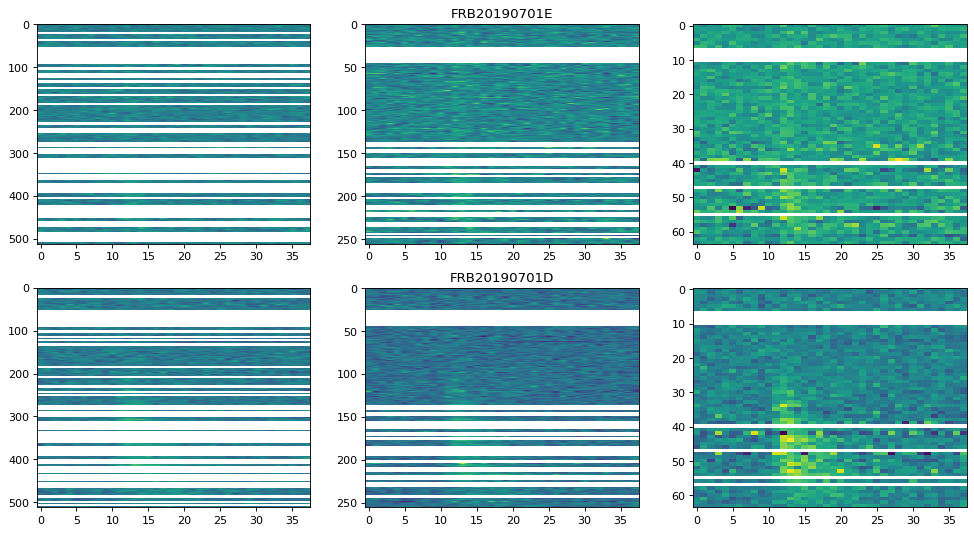

In [ ]:
j=0
plt.figure(figsize=(15,8),dpi=80)

plt.subplot(2,3,1)
plt.imshow(bin_freq_channels(wfalls[j],32), aspect="auto")
plt.subplot(2,3,2)
plt.title(eventnames[j])
plt.imshow(bin_freq_channels(wfalls[j],64), aspect="auto")
plt.subplot(2,3,3)
plt.imshow(bin_freq_channels(wfalls[j],256), aspect="auto")

j = 1
plt.subplot(2,3,4)
plt.imshow(bin_freq_channels(wfalls[j],32), aspect="auto")
plt.subplot(2,3,5)
plt.title(eventnames[j])
plt.imshow(bin_freq_channels(wfalls[j],64), aspect="auto")
plt.subplot(2,3,6)
plt.imshow(bin_freq_channels(wfalls[j],256), aspect="auto")

# Origianal Code

In [ ]:
data = h5py.File(file_name[0], "r")
data            = data["frb"]
eventname       = data.attrs["tns_name"].decode()
wfall           = data["wfall"][:]
model_wfall     = data["model_wfall"][:]
plot_time       = data["plot_time"][:]
plot_freq       = data["plot_freq"][:]
ts              = data["ts"][:]
model_ts        = data["model_ts"][:]
spec            = data["spec"][:]
model_spec      = data["model_spec"][:]
extent          = data["extent"][:]
dm              = data.attrs["dm"][()]
scatterfit      = data.attrs["scatterfit"][()]
cal_obs_date    = data.attrs["calibration_observation_date"].decode()
cal_source_name = data.attrs["calibration_source_name"].decode()
cal_wfall       = data["calibrated_wfall"][:]

dt = np.median(np.diff(plot_time)) # the delta (time) between time bins 



# RFI Removal

In [ ]:
q1 = np.nanquantile(spec, 0.25)
q3 = np.nanquantile(spec, 0.75)
iqr = q3 - q1

# additional masking of channels with RFI
rfi_masking_var_factor = 3

channel_variance = np.nanvar(wfall, axis=1)
mean_channel_variance = np.nanmean(channel_variance)

with np.errstate(invalid="ignore"):
    rfi_mask = (channel_variance > \
                rfi_masking_var_factor * mean_channel_variance) \
                | (spec[::-1] < q1 - 1.5 * iqr) | (spec[::-1] > q3 + 1.5 * iqr)
wfall[rfi_mask,...] = np.nan
model_wfall[rfi_mask,...] = np.nan
spec[rfi_mask[::-1]] = np.nan

# remake time-series after RFI masking
ts = np.nansum(wfall, axis=0)
model_ts = np.nansum(model_wfall, axis=0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: Degrees of freedom <= 0 for slice.
  


# Pulse Properties



In [ ]:
def boxcar_kernel(width):
    width = int(round(width, 0))
    return np.ones(width, dtype="float32") / np.sqrt(width)


def find_burst(ts, min_width=1, max_width=128):
    min_width = int(min_width)
    max_width = int(max_width)
    # do not search widths bigger than timeseries
    widths = list(range(min_width, min(max_width + 1, len(ts)-2)))
    # envelope finding
    snrs = np.empty_like(widths, dtype=float)
    peaks = np.empty_like(widths, dtype=int)
    for i in range(len(widths)):
        convolved = scipy.signal.convolve(ts, boxcar_kernel(widths[i]), mode="same")
        peaks[i] = np.nanargmax(convolved)
        snrs[i] = convolved[peaks[i]]
    best_idx = np.nanargmax(snrs)
    return peaks[best_idx], widths[best_idx], snrs[best_idx]


# Pulse Properties

In [ ]:
def boxcar_kernel(width):
    width = int(round(width, 0))
    return np.ones(width, dtype="float32") / np.sqrt(width)


def find_burst(ts, min_width=1, max_width=128):
    min_width = int(min_width)
    max_width = int(max_width)
    # do not search widths bigger than timeseries
    widths = list(range(min_width, min(max_width + 1, len(ts)-2)))
    # envelope finding
    snrs = np.empty_like(widths, dtype=float)
    peaks = np.empty_like(widths, dtype=int)
    for i in range(len(widths)):
        convolved = scipy.signal.convolve(ts, boxcar_kernel(widths[i]), mode="same")
        peaks[i] = np.nanargmax(convolved)
        snrs[i] = convolved[peaks[i]]
    best_idx = np.nanargmax(snrs)
    return peaks[best_idx], widths[best_idx], snrs[best_idx]


In [ ]:
peak, width, snr = find_burst(ts)
print(f"Peak: {peak} at time sample, Width = {width*dt} ms, SNR = {snr}")


Peak: 13 at time sample, Width = 2.9491200693883 ms, SNR = 172.48358435994464


# Bin Frequency Data

In [ ]:
def bin_freq_channels(data, fbin_factor=4):
    num_chan = data.shape[0]
    if num_chan % fbin_factor != 0:
        raise ValueError("frequency binning factor `fbin_factor` should be even")
    data = np.nanmean(data.reshape((num_chan // fbin_factor, fbin_factor) + data.shape[1:]), axis=1)
    return data


In [ ]:
# bin frequency channels such that we have 16,384/16 = 1024 frequency channels 
wfall = bin_freq_channels(wfall, 64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


# Plot the Dynamic Spectrum

Text(0.5, 0, 'Time [ms]')

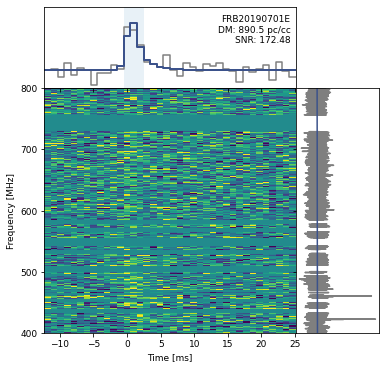

In [ ]:
fig = plt.figure(figsize=(6,6))
## Set up the image grid
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig, width_ratios=[3, 1],
                        height_ratios=[1, 3], hspace=0.0, wspace=0.0)
data_im = plt.subplot(   gs[2])
data_ts = plt.subplot(  gs[0], sharex=data_im)
data_spec = plt.subplot(gs[3], sharey=data_im)


### time stamps relative to the peak
peak_idx = np.argmax(ts)
extent[0] = extent[0] - plot_time[peak_idx]
extent[1] = extent[1] - plot_time[peak_idx]
plot_time -= plot_time[peak_idx]

# prepare time-series for histogramming
plot_time -= dt / 2.
plot_time = np.append(plot_time, plot_time[-1] + dt)

cmap = plt.cm.viridis

### plot dynamic spectrum
wfall[np.isnan(wfall)] = np.nanmedian(wfall)   # replace nans in the data with the data median
# use standard deviation of residuals to set color scale
vmin = np.nanpercentile(wfall, 1)
vmax = np.nanpercentile(wfall, 99)

data_im.imshow(wfall, aspect="auto", interpolation="none",
                extent=extent, vmin=vmin, vmax=vmax, cmap=cmap)

### plot time-series
data_ts.plot(plot_time, np.append(ts, ts[-1]), color="tab:gray",
                drawstyle="steps-post")

### plot spectrum
data_spec.plot(spec, plot_freq, color="tab:gray")

### plot model time-series and spectrum
if scatterfit:
    data_spec.plot(model_spec, plot_freq, color=cmap(0.25))
    data_ts.plot(plot_time, np.append(model_ts, model_ts[-1]),
                    color=cmap(0.25), drawstyle="steps-post", lw=2)
else:
    data_spec.plot(model_spec, plot_freq, color=cmap(0.5))
    data_ts.plot(plot_time, np.append(model_ts, model_ts[-1]),
                    color=cmap(0.5), drawstyle="steps-post", lw=1)


## BEautify plot
# remove some labels and ticks for neatness
plt.setp(data_ts.get_xticklabels(), visible=False)
data_ts.set_yticklabels([], visible=True)
data_ts.set_yticks([])
data_ts.set_xlim(extent[0], extent[1])
plt.setp(data_spec.get_yticklabels(), visible=False)
data_spec.set_xticklabels([], visible=True)
data_spec.set_xticks([])
data_spec.set_ylim(extent[2], extent[3])
plt.setp(data_im.get_xticklabels(), fontsize=9)
plt.setp(data_im.get_yticklabels(), fontsize=9)


#### highlighting the width of the pulse
data_ts.axvspan(max(plot_time.min(),
                        plot_time[peak] + 0.5 * dt \
                        - (0.5 * width) * dt),
                    min(plot_time.max(),
                        plot_time[peak] + 0.5 * dt \
                        + (0.5 * width) * dt),
                    facecolor="tab:blue", edgecolor=None, alpha=0.1)


##### add event ID and DM labels
xlim = data_ts.get_xlim()
ylim = data_ts.get_ylim()

# add 20% extra white space at the top
span = np.abs(ylim[1]) + np.abs(ylim[0])
data_ts.set_ylim(ylim[0], ylim[1] + 0.2 * span)
ylim = data_ts.get_ylim()

ypos = (ylim[1] - ylim[0]) * 0.9 + ylim[0]
xpos = (xlim[1] - xlim[0]) * 0.98 + extent[0]
data_ts.text(xpos, ypos, "{}\nDM: {:.1f} pc/cc\nSNR: {:.2f}".format(eventname, dm,snr), ha="right",
                va="top", fontsize=9)

data_im.locator_params(axis="x", min_n_ticks=3)
data_im.set_yticks([400, 500, 600, 700, 800])
data_im.set_ylabel("Frequency [MHz]", fontsize=9)
data_im.set_xlabel("Time [ms]", fontsize=9)


#Plotting Calibrated Data

In [ ]:
cal_ts = np.nanmean(cal_wfall, axis = 0)


In [ ]:
cal_wfall[np.isnan(cal_wfall)] = np.nanmedian(cal_wfall)   # replace nans in the data with the data median
#bin frequency channels such that we have 16,384/16 = 1024 frequency channels 
cal_wfall = bin_freq_channels(cal_wfall,16) 
vmin = np.nanpercentile(cal_wfall, 1)
vmax = np.nanpercentile(cal_wfall, 99)

times = np.arange(len(cal_ts))*dt
peak_idx = np.argmax(cal_ts)
times -= times[peak_idx]
times -= dt / 2.

extent[0] = times[0]
extent[1] = times[-1]



Text(0, 0.5, 'Flux [Jy]')

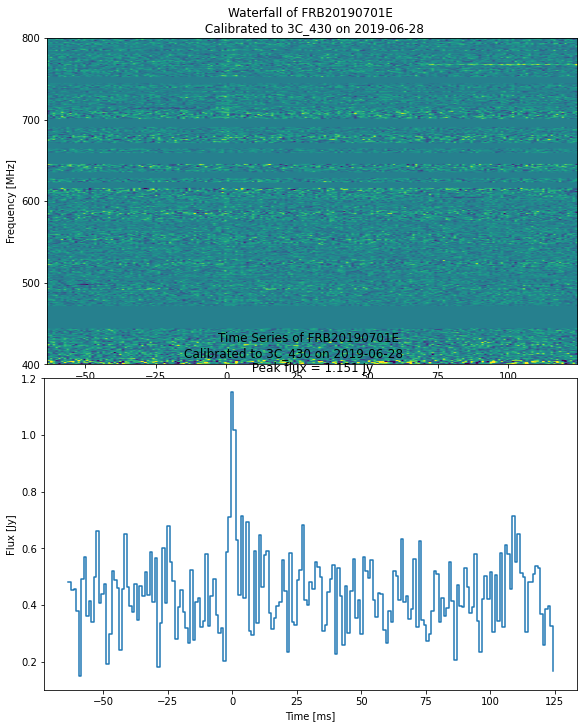

In [ ]:
fig = plt.figure(figsize=(8,10), constrained_layout=True)
layout = """
A
C
"""
plt.subplot(2,1,1)
plt.imshow(cal_wfall, aspect="auto", vmin=vmin,vmax=vmax, extent = extent )
plt.title(f"Waterfall of {eventname} \n Calibrated to {cal_source_name} on {cal_obs_date}")
plt.yticks([400, 500, 600, 700, 800])
plt.ylabel("Frequency [MHz]")


plt.subplot(2,1,2)

plt.plot(times,cal_ts, drawstyle="steps-post")
plt.xlabel("Time [ms]")
plt.title(f"Time Series of {eventname} \nCalibrated to {cal_source_name} on {cal_obs_date} \
        \n Peak flux = {cal_ts[peak_idx]:.3f} Jy")
plt.ylabel("Flux [Jy]")


In [ ]:
!git clone https://github.com/Kushaalkumar-pothula/FLARE.git
!cd FLARE

Cloning into 'FLARE'...
remote: Enumerating objects: 331, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 331 (delta 54), reused 0 (delta 0), pack-reused 224
Receiving objects: 100% (331/331), 570.15 KiB | 1018.00 KiB/s, done.
Resolving deltas: 100% (190/190), done.


In [ ]:
!bash gen.sh

bash: gen.sh: No such file or directory


In [ ]:
!main.py

/bin/bash: main.py: command not found
